# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
diamonds = pd.read_csv('diamonds_clean.csv')

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [28]:
diamonds.describe().transpose()

count         mean          std     min     25%      50%      75%  \
carat    53940.0     0.797940     0.474011    0.20    0.40     0.70     1.04   
color    53940.0     3.405803     1.701105    0.00    2.00     3.00     5.00   
clarity  53940.0     3.051020     1.647136    0.00    2.00     3.00     4.00   
depth    53940.0    61.749405     1.432621   43.00   61.00    61.80    62.50   
table    53940.0    57.457184     2.234491   43.00   56.00    57.00    59.00   
price    53940.0  3932.799722  3989.439738  326.00  950.00  2401.00  5324.25   
x        53932.0     5.732007     1.119670    3.73    4.71     5.70     6.54   
y        53933.0     5.734159     1.113273    3.68    4.72     5.71     6.54   
z        53932.0     3.539735     0.692051    1.07    2.91     3.53     4.04   

                  max  
carat        5.010000  
color        6.000000  
clarity      7.000000  
depth       79.000000  
table       95.000000  
price    18823.000000  
x           10.740000  
y           19.278421  
z            8.060000

In [29]:
'''
price=(326-18823)   75 percentile=5324

Looks like the price of some diamonds are extrodinary high. Are those prices reasonable?
'''

'\nprice=(326-18823)   75 percentile=5324\n\nLooks like the price of some diamonds are extrodinary high. Are those prices reasonable?\n'

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [30]:
'''
carat (weight)
size (x,y,z)
color
clarity

'''

'\ncarat (weight)\nsize (x,y,z)\ncolor\nclarity\n\n'

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [31]:
diamonds.groupby('color', as_index=False)['carat','clarity','price'].mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



color     carat   clarity        price
0      0  1.162137  2.776353  5323.818020
1      1  1.026927  2.964035  5091.874954
2      2  0.911799  2.933646  4486.669196
3      3  0.771190  3.463425  3999.135671
4      4  0.736538  3.133934  3724.886397
5      5  0.657867  2.969889  3076.752475
6      6  0.657795  2.691513  3169.954096

**What do you see? Pay special attention to the relationship between price and color.**

In [32]:
'''
the better the color, the less the carat. 
'''

'\nthe better the color, the less the carat. \n'

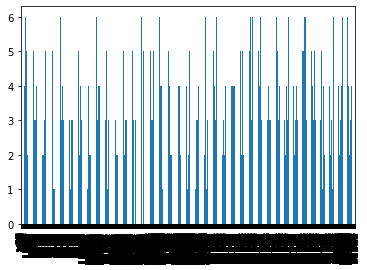

In [33]:
diamonds['color'].plot(kind='bar')

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

"\ncolor: IQR is between 2-5\nit dosen't show the color alone affects the price\n"

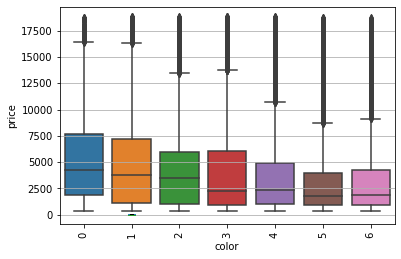

In [34]:
diamonds.boxplot(column='color')
# diamonds['color'].hist()

import plotly.express as px
# px.box(diamonds,y='color')


import seaborn as sns

Color=sns.boxplot(x='color',y='price',data=diamonds)
Color.set_xticklabels(Color.get_xticklabels(),rotation=90)


'''
color: IQR is between 2-5
it dosen't show the color alone affects the price
'''

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [10]:
diamonds.groupby('carat',as_index=False)['price'].mean()

carat         price
0     0.20    365.166667
1     0.21    380.222222
2     0.22    391.400000
3     0.23    486.143345
4     0.24    505.185039
..     ...           ...
268   4.00  15984.000000
269   4.01  15223.000000
270   4.13  17329.000000
271   4.50  18531.000000
272   5.01  18018.000000

[273 rows x 2 columns]

In [11]:
# diamonds.boxplot(column='carat')
px.box(diamonds,y='carat')


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

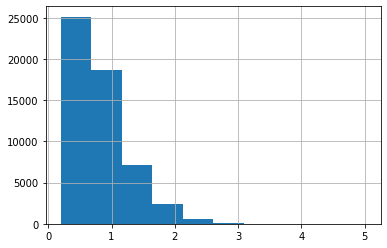

In [12]:
diamonds['carat'].hist()

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [13]:
'''
Looks like the relationship between table and price is random, table and color, table and clarity are random too.

'''

diamonds.groupby('table',as_index=False)['price','color','clarity'].mean()



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



table    price  color  clarity
0     43.0   4997.0    1.0     4.00
1     44.0    474.0    5.0     4.00
2     49.0   2290.5    3.0     3.00
3     50.0   8995.5    3.0     2.00
4     50.1   3353.0    2.0     1.00
..     ...      ...    ...      ...
122   71.0   1633.0    3.0     2.00
123   73.0   2406.5    4.5     3.25
124   76.0   2362.0    3.0     2.00
125   79.0   2301.0    4.0     1.00
126   95.0  13387.0    4.0     2.00

[127 rows x 4 columns]

**Finally, do the same with the `clarity` column.**

In [14]:
diamonds.groupby('clarity',as_index=False)['price','color','table'].mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



clarity        price     color      table
0        0  3924.168691  2.968961  58.303779
1        1  5063.028606  3.469980  57.927181
2        2  3996.001148  3.448450  57.662541
3        3  3924.989395  3.494208  57.417401
4        4  3839.455391  3.161792  57.315151
5        5  3283.737071  3.569483  57.024990
6        6  2523.114637  3.351573  56.884460
7        7  2864.839106  3.101676  56.507207

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [15]:
'''
Looks like the carat will affect the price most. 
'''

'\nLooks like the carat will affect the price most. \n'

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


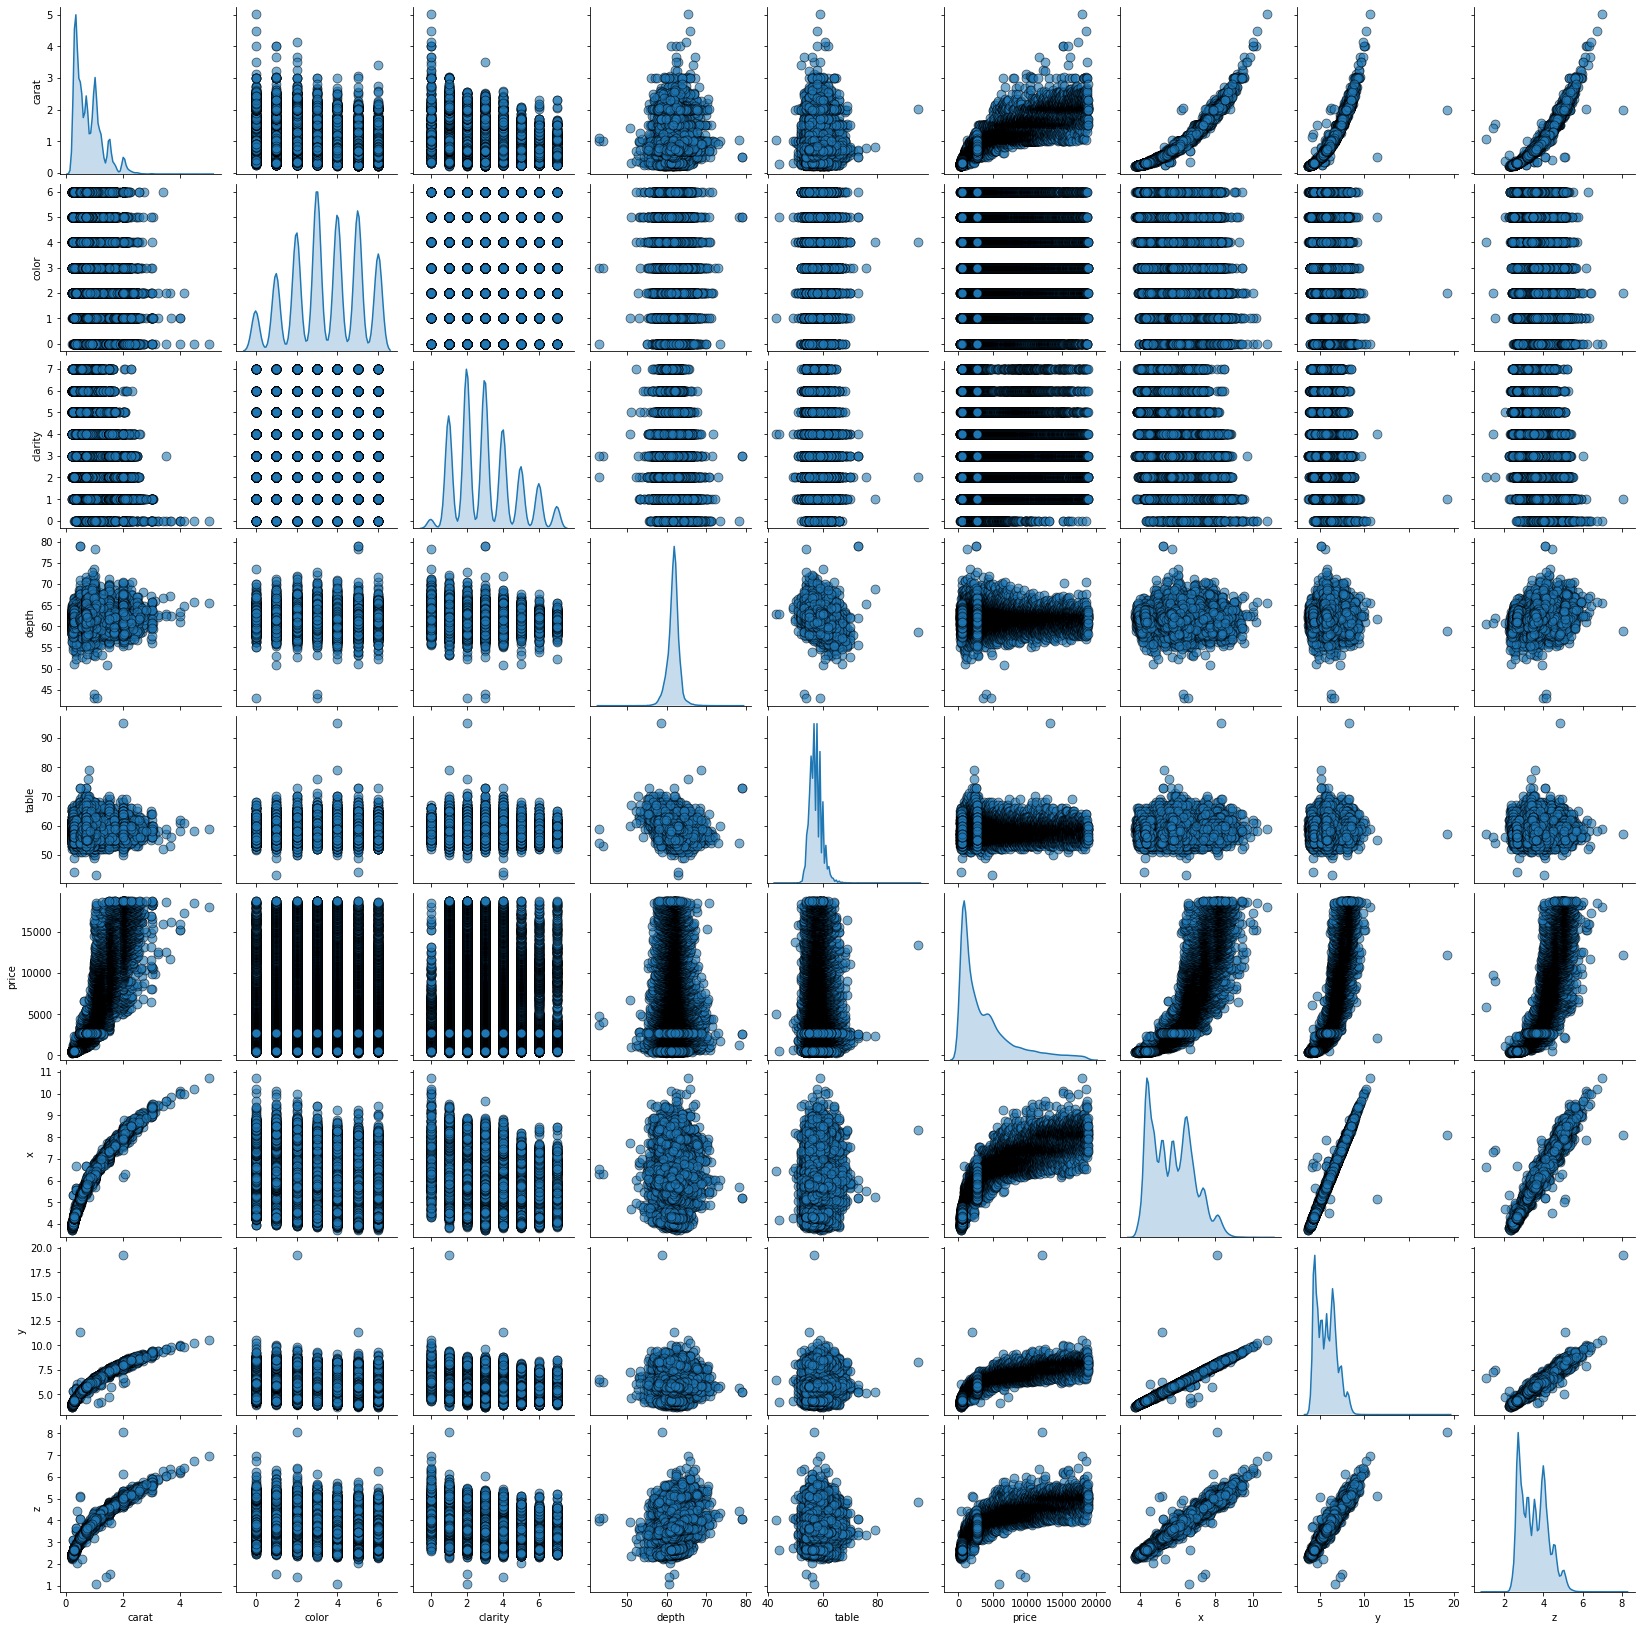

In [16]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

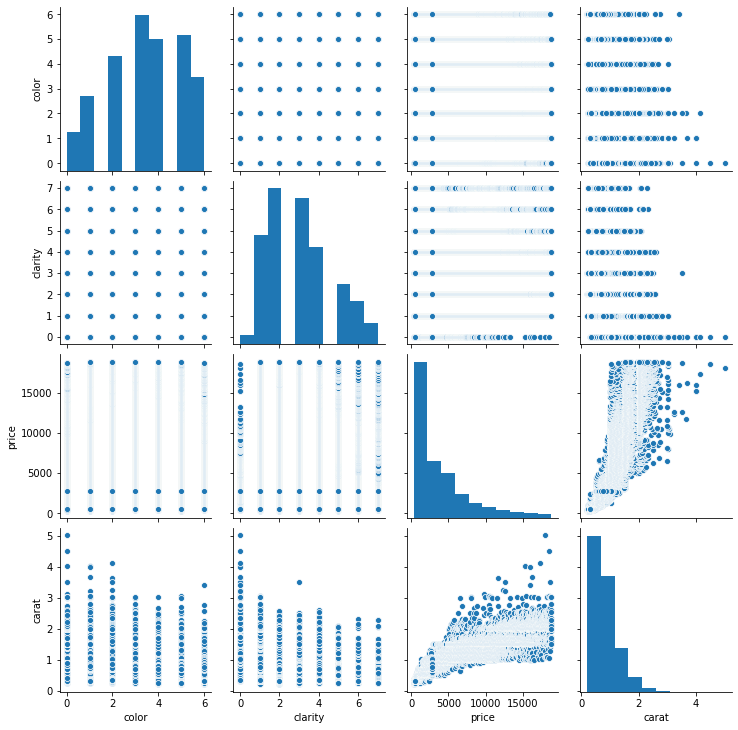

In [17]:
sns.pairplot(diamonds[['color','clarity','price','carat']])

**What do you see here? What relationships between variables are the most interesting?**

In [18]:
'''
Price vs Carat==> positive correction
'''

'\nPrice vs Carat==> positive correction\n'

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

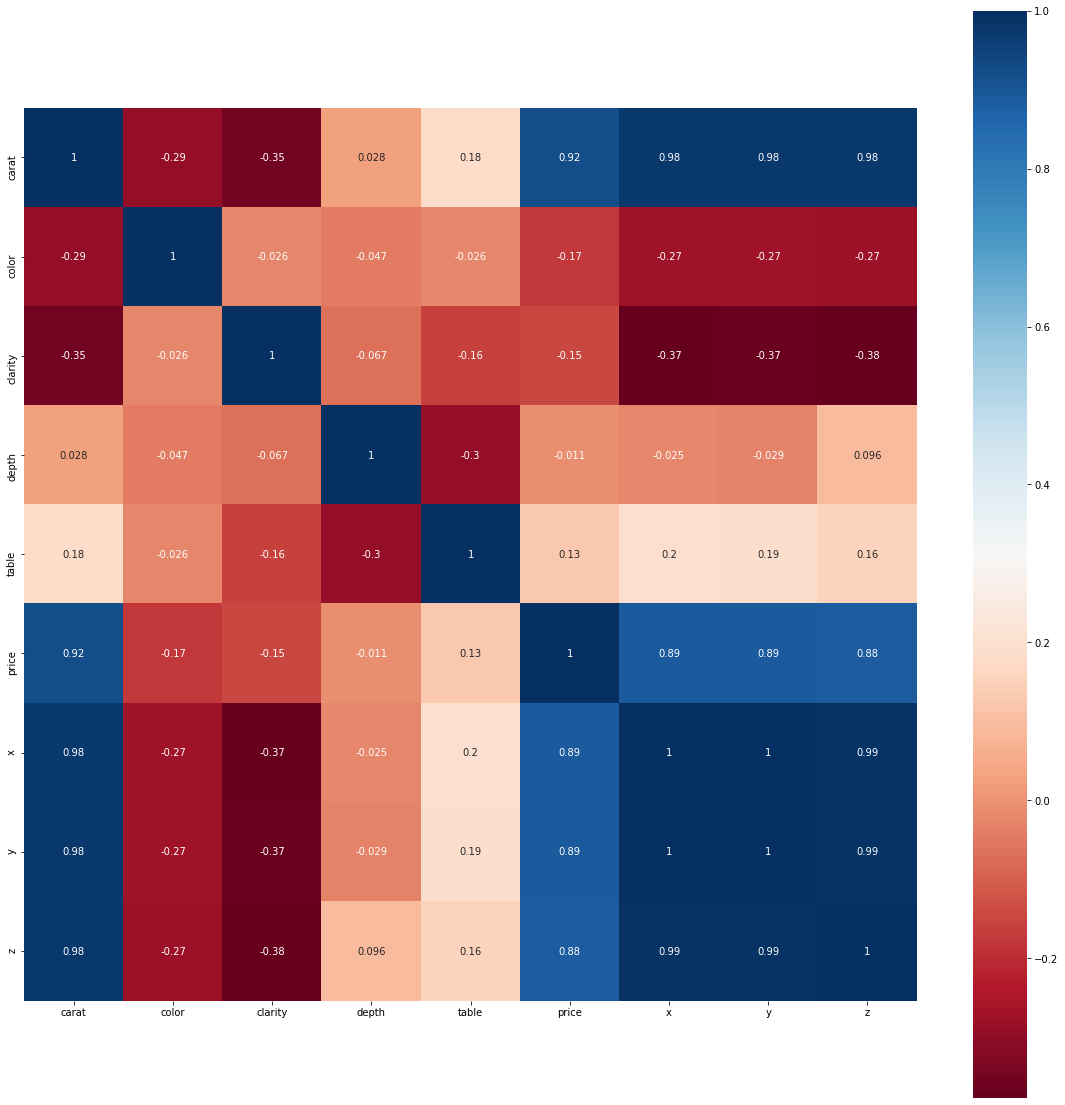

In [19]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True, cmap='RdBu')

**What do you see here? Regarding the results before, does it fit with them?**

In [20]:
'''
correction coefficient between CARAT and Price =0.98.    

==> Almost perfectly positively correlated
==> The heavier the diamonds, the more costly would be.





correction coefficient between CARAT and X,Y,Z =0.98.    

==> Almost perfectly positively correlated.
==> The heavier the diamonds, the larger the diamonds are.




correction coefficient between CLARITY and X,Y,Z/table =(-0.37, -0.38)

==> The higher the clarity, the lower the value of length, width, and depth.
==> 


'''

'\ncorrection coefficient between CARAT and Price =0.98.    \n\n==> Almost perfectly positively correlated\n==> The heavier the diamonds, the more costly would be.\n\n\n\n\n\ncorrection coefficient between CARAT and X,Y,Z =0.98.    \n\n==> Almost perfectly positively correlated.\n==> The heavier the diamonds, the larger the diamonds are.\n\n\n\n\ncorrection coefficient between CLARITY and X,Y,Z/table =(-0.37, -0.38)\n\n==> The higher the clarity, the lower the value of length, width, and depth.\n==> \n\n\n'

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

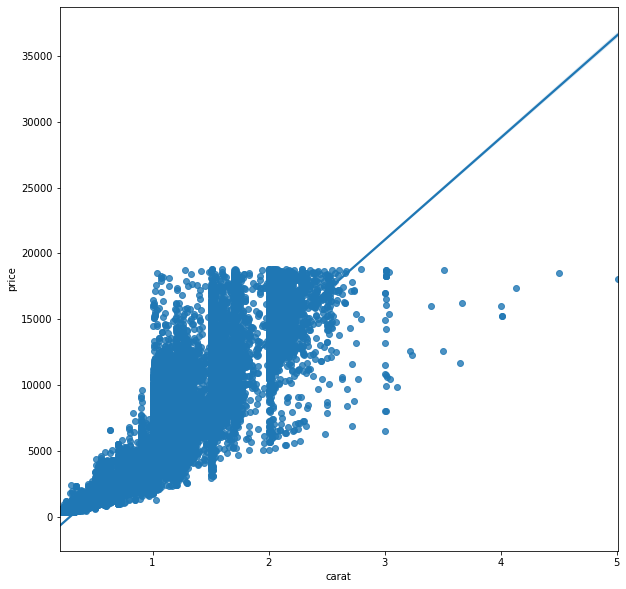

In [21]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [22]:
from scipy import stats
from sklearn.linear_model import LinearRegression


# use stastical linear regression function to calcuate slope and intercept

# Method 1: the output is strange.
# slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
# print('The slope is: '+ str(slope))
# print('The intercept is:' +str(intercept))



# Method 2
model=LinearRegression()
model.fit(diamonds['price'].values.reshape(-1,1),diamonds['carat'])
slope=model.coef_
intercept=model.intercept_
print('The slope is: '+ str(slope))     # Isn't the slop 0.00001 too low, the line is almost flate!!! Can I trust this number?
print('The intercept is:' +str(intercept))




The slope is: [0.0001095]
The intercept is:0.3672972041633436


In [23]:
import numpy as np
from scipy import stats

# Calculate the price which is dependent on carat
price_calculation=[intercept+slope*x for x in diamonds['carat']]  # output=price

# Calculate how far the calculated price from the real price
variance_price=[ x-y for x,y in zip(diamonds['price'],price_calculation)]  # variance=real price-caculated price
# print(variance_price)





# Calculate error%

price_cal_avg=np.sqrt((np.mean([a**2 for a in variance_price ])))  # Remove negatives
price_actual_avg=diamonds['price'].mean()  # Mean of Price

(np.mean([price_cal_avg/price_actual_avg]))*100   # error %


142.43614036906123

**What do you think?**

In [24]:
'''
I am not sure which pair of outputs is correct?

The error percentate is toooooo high
'''

'\nI am not sure which pair of outputs is correct?\n\nThe error percentate is toooooo high\n'

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [25]:
#your thoughts here

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.